<a href="https://colab.research.google.com/github/Maks3174/Phy/blob/main/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Завдання 1
Виведіть основні числові характеристики для числових ознак

In [4]:
numerical_columns = df.select_dtypes(include=[np.number])
print("Основні числові характеристики:")
print(numerical_columns.describe())

Основні числові характеристики:
             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.250000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.459223   48.130769   15.046154   27.000000   32.586538 

# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

In [5]:
print("\nАналіз стовпчика 'case':")
case_unique = df['case'].nunique()
print(f"Унікальних значень у стовпчику 'case': {case_unique}")
print("Стовпчик 'case' не інформативний, оскільки він є унікальним ідентифікатором для кожного запису.")


Аналіз стовпчика 'case':
Унікальних значень у стовпчику 'case': 104
Стовпчик 'case' не інформативний, оскільки він є унікальним ідентифікатором для кожного запису.


# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

In [6]:
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1


# Завдання 4
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

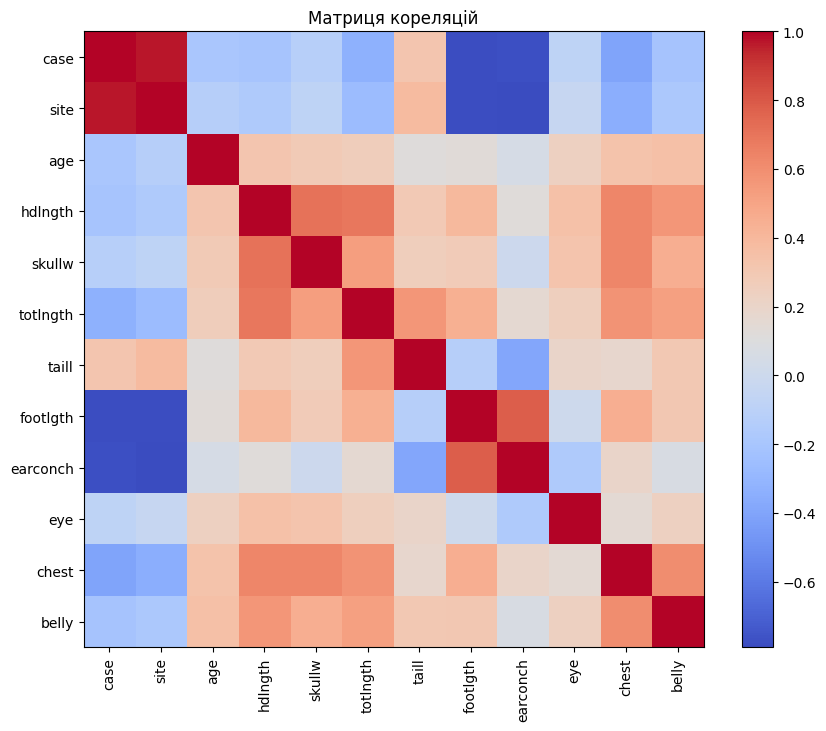

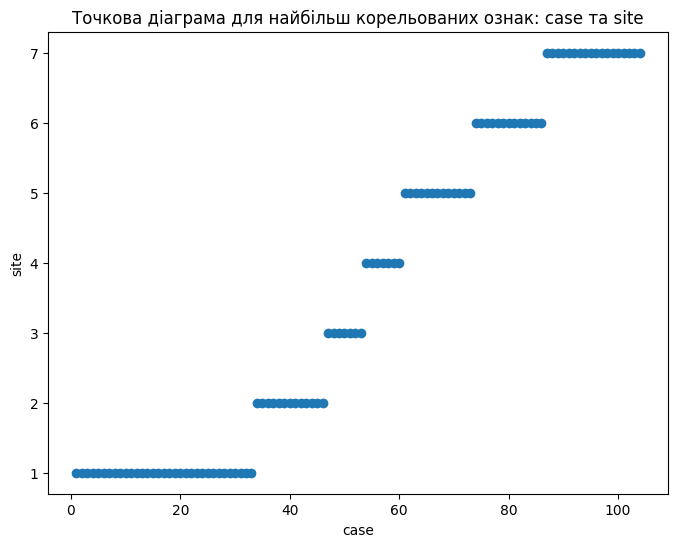

In [13]:
numerical_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
plt.title("Матриця кореляцій")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs != 1]
most_correlated = correlation_pairs.idxmax()

plt.figure(figsize=(8, 6))
plt.title(f"Точкова діаграма для найбільш корельованих ознак: {most_correlated[0]} та {most_correlated[1]}")
plt.scatter(df[most_correlated[0]], df[most_correlated[1]])
plt.xlabel(most_correlated[0])
plt.ylabel(most_correlated[1])
plt.show()


# Завдання 5
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума

<ipython-input-15-845b3561f046>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)
<ipython-input-15-845b3561f046>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)
<ipython-input-15-845b3561f046>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


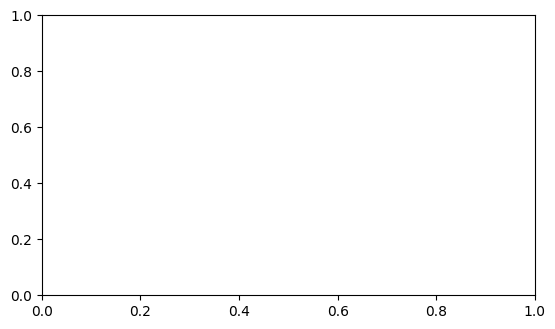

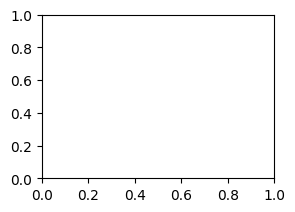

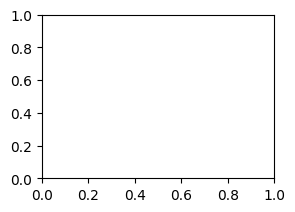

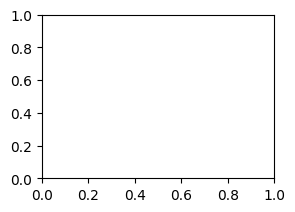

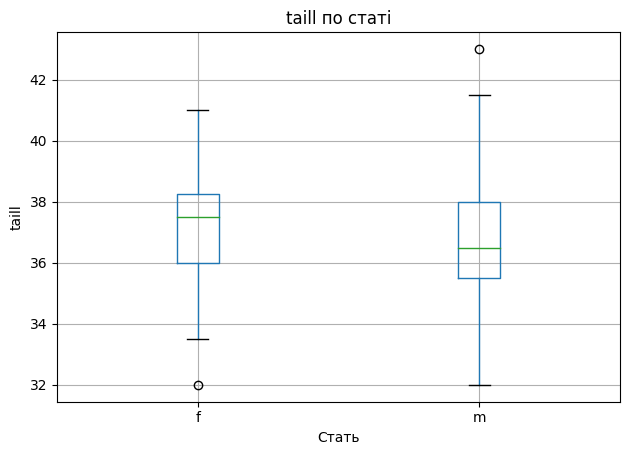

Аналіз ящиків з вусами показує, що статевий фактор може впливати на розміри опосума.


In [15]:
features = ['hdlngth', 'skullw', 'totlngth', 'taill']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=feature, by='sex')
    plt.title(f'{feature} по статі')
    plt.suptitle('')
    plt.xlabel('Стать')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

print("Аналіз ящиків з вусами показує, що статевий фактор може впливати на розміри опосума.")